In [1]:
%matplotlib inline
from matplotlib import pyplot as plt

import numpy as np
from linear_reassignment import create_reassigned_representation, create_reassigned_representation_sparse
from scipy.io import wavfile
import librosa
from scipy.io import loadmat

In [2]:
result_matlab = loadmat('data/verify_correctness.mat')['result']
x_matlab = loadmat('data/verify_correctness.mat')['x']

Plotting the result from Matlab.

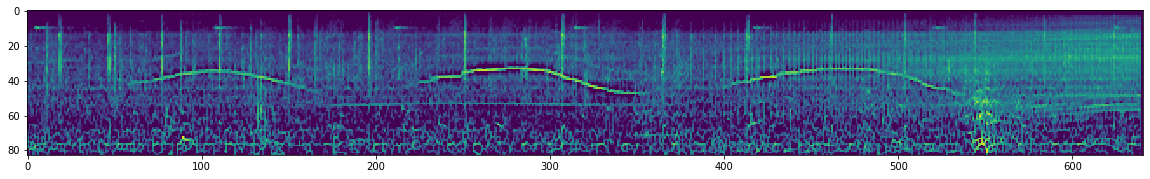

In [3]:
plt.figure(figsize = (20,4))
plt.imshow(librosa.core.amplitude_to_db(result_matlab.todense().T))

In [4]:
q = 2;
tdeci = 450;
over = 20;
noct = 12;
minf = 4e-3;
maxf = 0.45;

In [5]:
%%time

result_python_dense = create_reassigned_representation(x_matlab, q, tdeci, over, noct, minf, maxf)

CPU times: user 37min 9s, sys: 1min 41s, total: 38min 50s
Wall time: 6min 28s


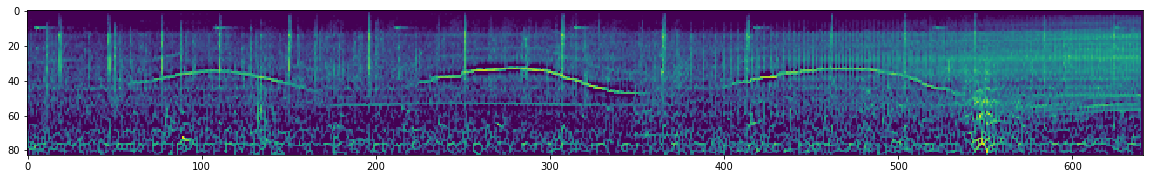

In [6]:
plt.figure(figsize = (20,4))
plt.imshow(librosa.core.amplitude_to_db(result_python_dense.T))

In [7]:
%%time

result_python_sparse = create_reassigned_representation_sparse(x_matlab, q, tdeci, over, noct, minf, maxf)

CPU times: user 1h 29min 58s, sys: 1h 10min 8s, total: 2h 40min 6s
Wall time: 27min 47s


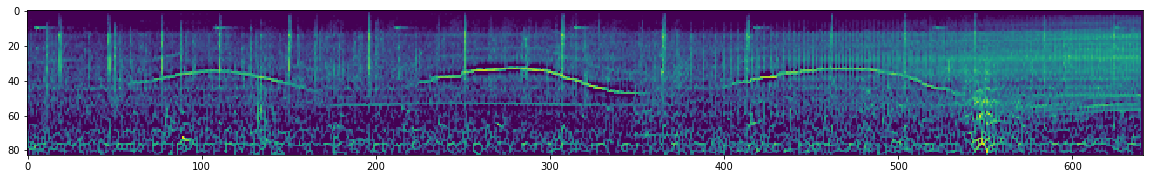

In [8]:
plt.figure(figsize = (20,4))
plt.imshow(librosa.core.amplitude_to_db(result_python_sparse.todense().T))

In [9]:
result_matlab.todense()[0, :10]

matrix([[7.84406079e-06, 2.43280844e-05, 2.38775212e-05, 3.25661946e-05,
         3.97327638e-05, 4.30144901e-05, 5.24843663e-05, 5.37024620e-05,
         5.86939640e-05, 9.62354563e-05]])

In [10]:
result_python_dense[0, :10]

array([6.56610113e-06, 2.45028082e-05, 2.37418262e-05, 3.25301617e-05,
       3.97327686e-05, 4.30144878e-05, 5.24843680e-05, 5.37024616e-05,
       5.86939576e-05, 9.62354438e-05])

In [11]:
result_python_sparse.todense()[0, :10]

matrix([[6.56610113e-06, 2.45028082e-05, 2.37418262e-05, 3.25301617e-05,
         3.97327686e-05, 4.30144878e-05, 5.24843680e-05, 5.37024616e-05,
         5.86939576e-05, 9.62354438e-05]])

In [12]:
np.max(result_matlab.todense() - result_python_dense)

6.91408009709793e-05

In [13]:
np.max(result_matlab.todense() - result_python_sparse.todense())

6.914080097142339e-05

In [14]:
np.allclose(result_matlab.todense(), result_python_dense, atol=1e-4)

True

In [15]:
np.allclose(result_matlab.todense(), result_python_sparse.todense(), atol=1e-4)

True